<div style="border-radius:10px;
            border:#0b0265 solid;
           background-color:#0077be;
           font-size:110%;
           letter-spacing:0.5px;
            text-align: center">

<center><h1 style="padding: 25px 0px; background color:#0077be; font-weight: bold; font-family: Cursive">
Flappy Bird using Deep Learning</h1></center>

</div>

# Using Deep Q-Network to Learn How To Play Flappy Bird

This project follows the description of the Deep Q Learning algorithm described in Playing Atari with Deep Reinforcement Learning [2] and shows that this learning algorithm can be further generalized to the notorious Flappy Bird.

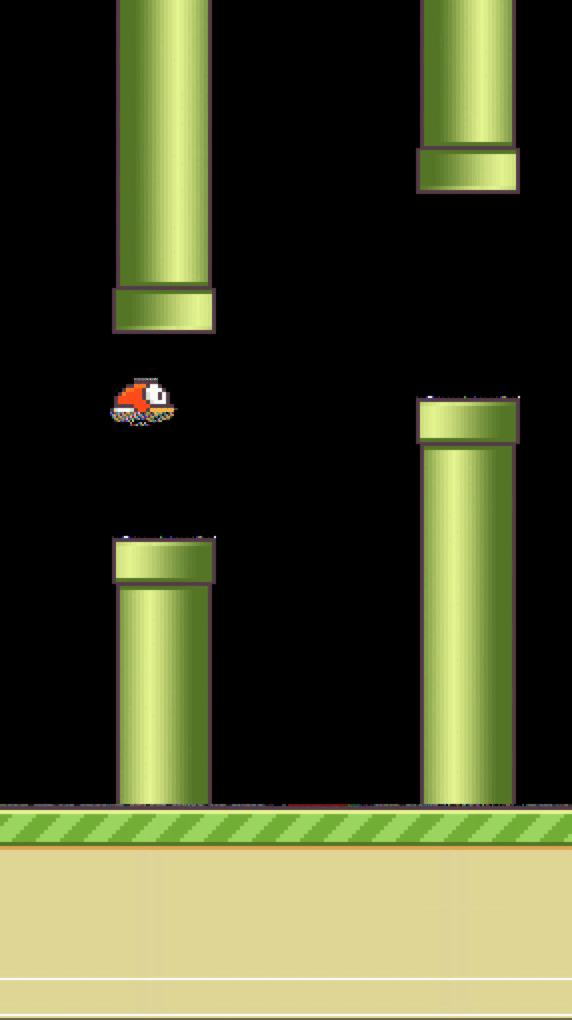

## What is Deep Q-Network?


It is a convolutional neural network, trained with a variant of Q-learning, whose input is raw pixels and whose output is a value function estimating future rewards.

For those who are interested in deep reinforcement learning, I highly recommend to read the following post:

Demystifying Deep Reinforcement Learning

## Deep Q-Network Algorithm

## Experiments

Environment

Since deep Q-network is trained on the raw pixel values observed from the game screen at each time step, [3] finds that remove the background appeared in the original game can make it converge faster. This process can be visualized as the following figure:

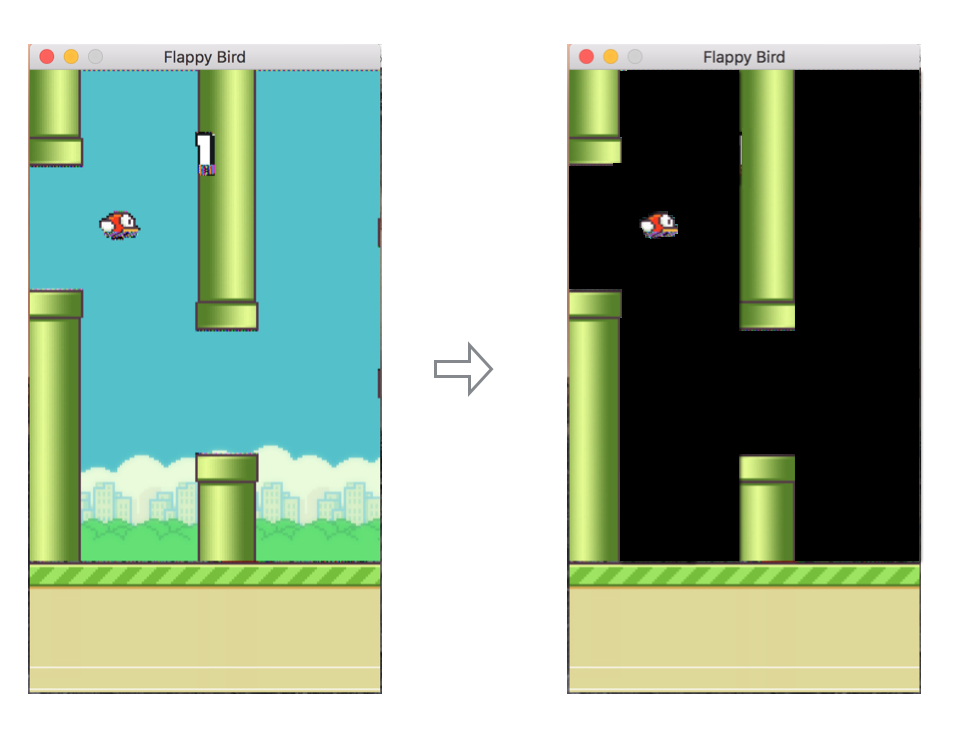

### Network Architecture

According to [1], I first preprocessed the game screens with following steps:

Convert image to grayscale
Resize image to 80x80
Stack last 4 frames to produce an 80x80x4 input array for network
The architecture of the network is shown in the figure below. The first layer convolves the input image with an 8x8x4x32 kernel at a stride size of 4. The output is then put through a 2x2 max pooling layer. The second layer convolves with a 4x4x32x64 kernel at a stride of 2. We then max pool again. The third layer convolves with a 3x3x64x64 kernel at a stride of 1. We then max pool one more time. The last hidden layer consists of 256 fully connected ReLU nodes.

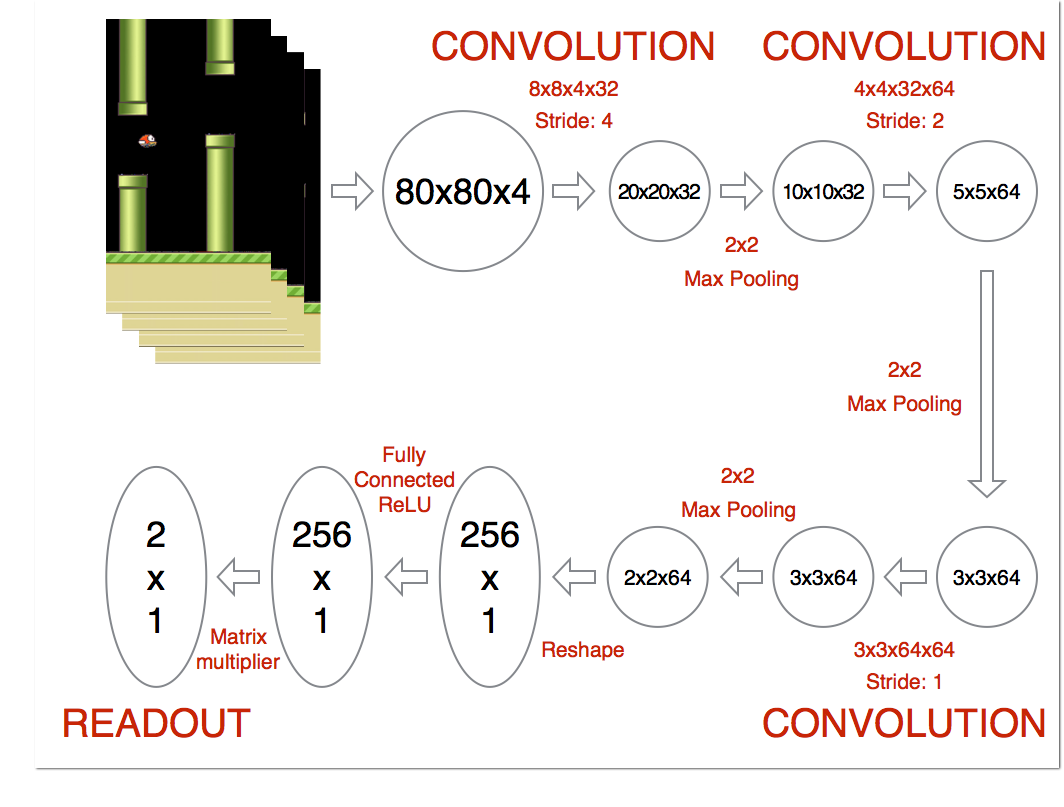

The final output layer has the same dimensionality as the number of valid actions which can be performed in the game, where the 0th index always corresponds to doing nothing. The values at this output layer represent the Q function given the input state for each valid action. At each time step, the network performs whichever action corresponds to the highest Q value using a ϵ greedy policy.

**Training**

At first, I initialize all weight matrices randomly using a normal distribution with a standard deviation of 0.01, then set the replay memory with a max size of 500,00 experiences.

I start training by choosing actions uniformly at random for the first 10,000 time steps, without updating the network weights. This allows the system to populate the replay memory before training begins.

Note that unlike [1], which initialize ϵ = 1, I linearly anneal ϵ from 0.1 to 0.0001 over the course of the next 3000,000 frames. The reason why I set it this way is that agent can choose an action every 0.03s (FPS=30) in our game, high ϵ will make it flap too much and thus keeps itself at the top of the game screen and finally bump the pipe in a clumsy way. This condition will make Q function converge relatively slow since it only start to look other conditions when ϵ is low. However, in other games, initialize ϵ to 1 is more reasonable.

During training time, at each time step, the network samples minibatches of size 32 from the replay memory to train on, and performs a gradient step on the loss function described above using the Adam optimization algorithm with a learning rate of 0.000001. After annealing finishes, the network continues to train indefinitely, with ϵ fixed at 0.001.

***References***

[1] Mnih Volodymyr, Koray Kavukcuoglu, David Silver, Andrei A. Rusu, Joel Veness, Marc G. Bellemare, Alex Graves, Martin Riedmiller, Andreas K. Fidjeland, Georg Ostrovski, Stig Petersen, Charles Beattie, Amir Sadik, Ioannis Antonoglou, Helen King, Dharshan Kumaran, Daan Wierstra, Shane Legg, and Demis Hassabis. Human-level Control through Deep Reinforcement Learning. Nature, 529-33, 2015.

[2] Volodymyr Mnih, Koray Kavukcuoglu, David Silver, Alex Graves, Ioannis Antonoglou, Daan Wierstra, and Martin Riedmiller. Playing Atari with Deep Reinforcement Learning. NIPS, Deep Learning workshop

[3] Kevin Chen. Deep Reinforcement Learning for Flappy Bird Report | Youtube result

***Disclaimer***

This work is highly based on the following repos:

[sourabhv/FlapPyBird] (https://github.com/sourabhv/FlapPyBird)

asrivat1/DeepLearningVideoGames(https://github.com/nikitasrivatsan/DeepLearningVideoGames)

<div style="font-family: Times New Roman; font-size: 16px; color: #333; background-color: #f8f8f8; padding: 10px; border: 1px solid #ccc;">
    <p>🙏 Thank you all for taking the time to read my backpropagation notebook! I am incredibly grateful for your support and engagement. It means a lot to me to see your positive response and thoughtful comments. Your feedback and encouragement motivate me to keep sharing valuable content. If there's anything specific you'd like me to cover in the future, please let me know. Once again, thank you for being a part of this journey! 🌟

Regards       
Jatin

You can go through my repository : https://github.com/JatinAllamsetty27/Flappy-Bird-using-Deep-Learning
</p>
</div>